In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 0.LIBRARIES REQUIRED

In [2]:
#Data Analysis
import numpy as np
import pandas as pd
import scipy.stats as stat

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import scipy.stats as stat

#Model Creations
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Model Validation 
from sklearn.model_selection import  cross_val_score, StratifiedKFold, learning_curve

#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.shape,test.shape

((891, 12), (418, 11))

In [5]:
train.info() #to check the type of data int/float, and the vogue idea about null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()  #to check the type of data int/float, and the vogue idea about null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [8]:
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1.EXPLORATORY DATA ANALYSIS (EDA)

## EDA (Catagorical Features)

In [10]:
#quant_features=train.select_dtypes(exclude=['object']).columns
#cat_features=train.select_dtypes(include=['object']).columns
quant_feature=['Age','SibSp','Parch','Fare']
cat_features=['Pclass','Sex','Embarked','Ticket','Cabin','Survived']

In [11]:
# for i in cat_features:
#     #sns.countplot(x=i,data=train)
#     sns.countplot(x=i,data=train,hue='Survived')
#     plt.show()
#     sns.barplot(x=i,y='Survived',data=train)
#     plt.show()

## EDA Numerical Features

In [12]:
#Check the disturbution of quantiative data and might be required to standardize/normalize it , 

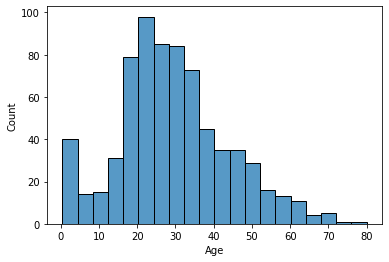

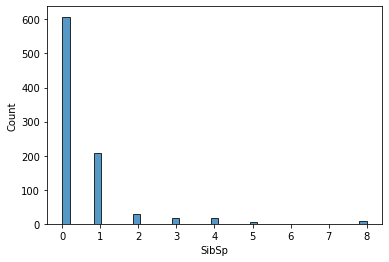

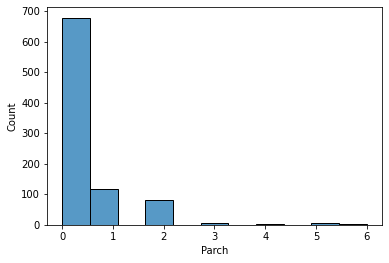

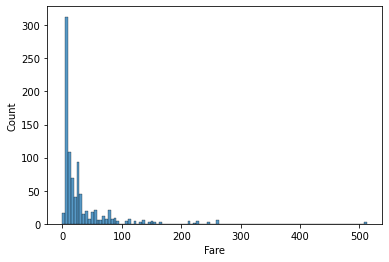

In [13]:
for i in quant_feature:
    sns.histplot(train[i])
    plt.show()
    

<AxesSubplot:>

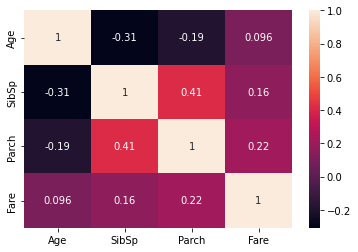

In [14]:
#heatmap to check the correclation between the featues , 
#if it is highly correlated we have to ignore one of the feature
sns.heatmap(train[quant_feature].corr(),annot=True)  

In [15]:
x=pd.pivot_table(train,index='Survived',values=quant_feature)
x

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [16]:
group_survival=train.groupby(['Survived','Pclass'])

In [17]:
group_survival['Age',].mean()

Age
Survived Pclass           
0        1       43.695312
         2       33.544444
         3       26.555556
1        1       35.368197
         2       25.901566
         3       20.646118

# 2.FEATURE ENGINEERING

In [18]:
"""
Creating a new dataset by combining both the test and train data ,which will be easy to preprocess and later just before modeling split it again into train and test 
This will avoid the tedious process of preprocessing train and test datasets seperately and avoid confusiions lateron """
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [19]:
IDtest = test["PassengerId"]
"""
The passenger id for the test data is required as column name IDtest in future for submission 
"""

'\nThe passenger id for the test data is required as column name IDtest in future for submission \n'

In [20]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Handling Null/Nan values

In [21]:
dataset['Embarked']=dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])  
#since it is two Nan in Embarked, filled with the mode or maximum occurance

In [22]:
dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].median()) 
#Nan-Fare values filled with median of the data

Handling NaN : AGE
First need to find which are the other features have influence to age feature
So plot other features against Age

<AxesSubplot:xlabel='Sex', ylabel='Age'>

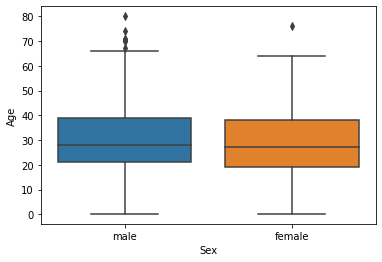

In [23]:
sns.boxplot(x='Sex',y='Age',data=dataset)
# the distribution of age data (range as well as the mean ) against Gender are amlost same.
# we can ignore this feature to fill Age Nan.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

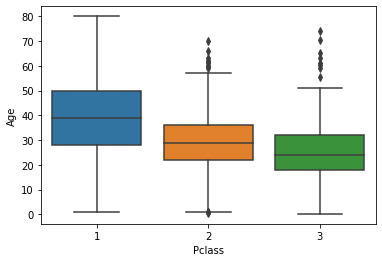

In [24]:
sns.boxplot(x='Pclass',y='Age',data=dataset)
#in this we can observe the distribution of Age against different Pclass class is different , 
#so this can be considered to fill Age NaN values

<AxesSubplot:xlabel='Parch', ylabel='Age'>

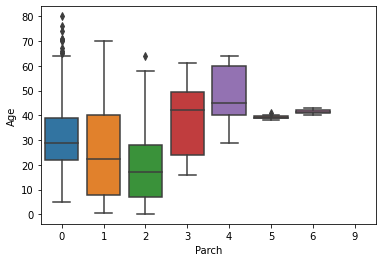

In [25]:
sns.boxplot(x='Parch',y='Age',data=dataset)
#in this we can observe the distribution of Age against different Parch class is different , 
#so this can be considered to fill Age NaN values

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

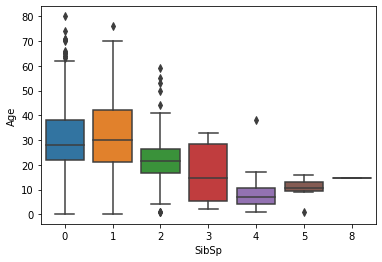

In [26]:
sns.boxplot(x='SibSp',y='Age',data=dataset)
#in this we can observe the distribution of Age against different SibSp class is different , 
#so this can be considered to fill Age NaN values

So belwo we created a code in to find the age Nan rows having the PClass,Parch,SibSp , have same values eg Row 5,19,
then find the rows of same values and fill the with the mean of that group

If we cant find such group then fill those Nan Ages with Median of the Ages.

In [27]:

index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) &
                               (dataset['Parch'] == dataset.iloc[i]["Parch"]) &
                               (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
#total passengers is 1309, but unique ticket count is  only 929, that means there might be more than one passengers in one ticket or same cabin
dataset.shape ,len(dataset['Ticket'].unique())

((1309, 12), 929)

In [29]:
dataset['Cabin'].unique() #This is to check the non filled nan cabins what string can be used to impute , XX is not in current data so used XX string to impute

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
"""Below code is used to fill the Nan cabin values with the exisitng cabin values which have same ticket number of the missing cabin(Nan Cabin)
But not much effective since only 14 cabins can be able to fill in that way 
so the remaining cabins considered as a seperate class named XX
"""
index_NaN_cabin = list(dataset["Cabin"][dataset["Cabin"].isnull()].index)
for i in index_NaN_cabin:
    for j in range(0,len(dataset)):
        if dataset['Ticket'].iloc[j]==dataset['Ticket'].iloc[i]:
            dataset['Cabin'].iloc[i]=dataset['Cabin'].iloc[j]
            continue

dataset['Cabin']=dataset['Cabin'].fillna('XX')

In [31]:
dataset.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Feature Extraction

### Name

In [32]:
"""
Just to check the behaviour name data"""
dataset['Name'].head(5),dataset['Name'].tail(5)

(0                              Braund, Mr. Owen Harris
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...
 2                               Heikkinen, Miss. Laina
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
 4                             Allen, Mr. William Henry
 Name: Name, dtype: object,
 1304              Spector, Mr. Woolf
 1305    Oliva y Ocana, Dona. Fermina
 1306    Saether, Mr. Simon Sivertsen
 1307             Ware, Mr. Frederick
 1308        Peter, Master. Michael J
 Name: Name, dtype: object)

Feature Extraction from Name columns
If we observe the every names have tittle(Mr,Mrs,Rev,Countess etc) which may give the some information 
to group the namesInstead of completley omiting the name column as irrelevent we can check what information 
we can extract from the name columns
If we observe the tittle of the name comes after the surname seperated with a comma.So we can split all the 
names with respect to comma get into a list and from the list take the second element which is tittle


In [33]:
title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]

In [34]:
dataset['Title']=pd.Series(title) #added the tittle series to the dataframe 
dataset['Title'].unique() #eheck the unique values

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [35]:
group_title=dataset.iloc[:len(train)].groupby('Title')
group_title['Survived'].value_counts(normalize=True)


Title         Survived
Capt          0.0         1.000000
Col           0.0         0.500000
              1.0         0.500000
Don           0.0         1.000000
Dr            0.0         0.571429
              1.0         0.428571
Jonkheer      0.0         1.000000
Lady          1.0         1.000000
Major         0.0         0.500000
              1.0         0.500000
Master        1.0         0.575000
              0.0         0.425000
Miss          1.0         0.697802
              0.0         0.302198
Mlle          1.0         1.000000
Mme           1.0         1.000000
Mr            0.0         0.843327
              1.0         0.156673
Mrs           1.0         0.792000
              0.0         0.208000
Ms            1.0         1.000000
Rev           0.0         1.000000
Sir           1.0         1.000000
the Countess  1.0         1.000000
Name: Survived, dtype: float64

In [36]:
"""
By observing above table we can find some inputs about the survival rate among the tittle groups 
so we can group the passengers according to the tittle and its survival rates"""

group1=['Capt','Rev','Jonkheer','Don','Dona'] #grouped based on survival rate
group2=['Dr', 'Major','Col'] #grouped based on survival rate
group3=['the Countess','Countess', 'Sir',] #grouped based on survial rate
group4=['Mr'] #title for men
group5=['Master'] #title for a boys
group6=[ 'Mrs', 'Miss','Mme', 'Ms','Mlle','Lady']# tittle for ladies


dataset['Title']=dataset['Title'].replace(group1,'1')
dataset['Title']=dataset['Title'].replace(group2,'2')
dataset['Title']=dataset['Title'].replace(group3,'3')
dataset['Title']=dataset['Title'].replace(group4,'4')
dataset['Title']=dataset['Title'].replace(group5,'5')
dataset['Title']=dataset['Title'].replace(group6,'6')
dataset["Title"] = dataset["Title"].astype(int)

In [37]:
dataset['Title'].unique()

array([4, 6, 5, 1, 2, 3])

In [38]:

"""
After grouping as above , if we check the groupby again it gives some meaning tittle class"""
group_title=dataset.iloc[:len(train)].groupby('Title')
group_title['Survived'].value_counts(normalize=True)

Title  Survived
1      0.0         1.000000
2      0.0         0.545455
       1.0         0.454545
3      1.0         1.000000
4      0.0         0.843327
       1.0         0.156673
5      1.0         0.575000
       0.0         0.425000
6      1.0         0.740385
       0.0         0.259615
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

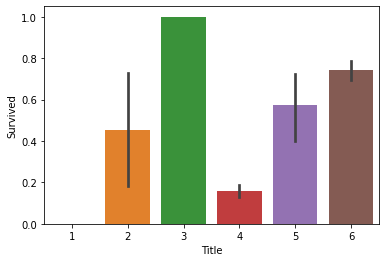

In [39]:
sns.barplot(x='Title',y='Survived',data=dataset.iloc[:len(train)])
#This became more meaning full grouping and it obvious that group 3 has highest survival rate and group 1 has least survival rate


In [40]:
#So now drop the name colums from the dataset , adn keep title instead
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

### Cabin

CABIN
Few of the materials in internet shows that there are decks named A,B,C etc so there is a strong belief that the prefix in the cabin number is nothing but the 
deck. so in that belief we can extract the initial alphabets and classify it as decks

In [41]:
# Replace the Cabin number by the type of cabin 'XX' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

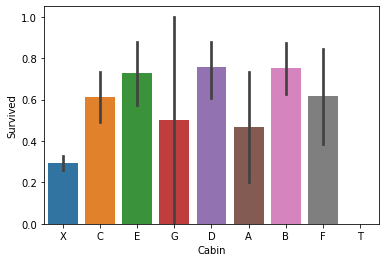

In [42]:
sns.barplot(data=dataset,x='Cabin',y='Survived')

### Ticket

In [43]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [44]:
dataset['Ticket'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

FAMILY
We can observe that the chance of survival is differnet depends on the size of the family.
here the family is the combination of the number of parents / children aboard the Titanic and number of siblings / spouses aboard the Titanic.
so we can find the size each family onboard by adding Sibp and Parch + 1(passenger himself)

### Sib /Parch

In [45]:
dataset['Family']=dataset["SibSp"] + dataset["Parch"] + 1 

Below plot shows the survial probability based on family class, and the most is with the familyh number 4,
But its not necessary that the indivitual traveller will survive , it may be most of the lone travellers are males.
Also we can observe that the family size beyond 5 has less chance of survival since the difficulity in mobility altogether.
by looking below details we can divide the family data into few classes , like single, small family, medium,large,very large

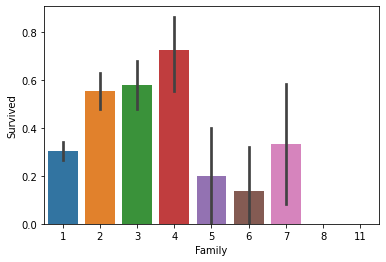

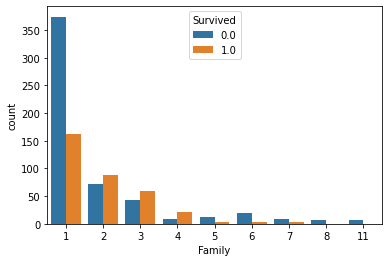

In [46]:
sns.barplot(x='Family',y='Survived',data=dataset)
plt.show()
sns.countplot(x='Family',hue='Survived',data=dataset)
plt.show()

In [47]:
dataset['Family'].head()

0    2
1    2
2    1
3    2
4    1
Name: Family, dtype: int64

for i in range(0,len(dataset)):
    print (dataset['Family'].iloc[i])

In [48]:
for i in range(0,len(dataset)):
    if dataset['Family'].iloc[i]== 1:
        dataset['Family'].iloc[i] = 'Single'
    elif dataset['Family'].iloc[i] == 2:
        dataset['Family'].iloc[i] = 'Couple'
    elif dataset['Family'].iloc[i] >= 3 and dataset['Family'].iloc[i] <=4 :
        dataset['Family'].iloc[i] = 'SmallFam'
    elif dataset['Family'].iloc[i] >= 5 and dataset['Family'].iloc[i] <=7 :
        dataset['Family'].iloc[i] = 'LargeFam'
    elif dataset['Family'].iloc[i] > 7  :
        dataset['Family'].iloc[i] = 'BigFam'
        
        

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
dataset['Family'].unique()

array(['Couple', 'Single', 'LargeFam', 'SmallFam', 'BigFam'], dtype=object)

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   int64  
 12  Family       1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


## Feature Transformations for Linear models

CHECK THE DATA DISTRUBITION AND SKEW OF EACH NUMERICAL FEATURES

Below we can check the skew and try different transformers so that the skew will be minimum . among all Yeo john transformer has least skew 
Also we cant use the box cox transformer since we have some zero values in Fare.

### Fare

In [51]:
dataset['Fare'].skew()

4.3695095504693855

Skew: 4.3695095504693855


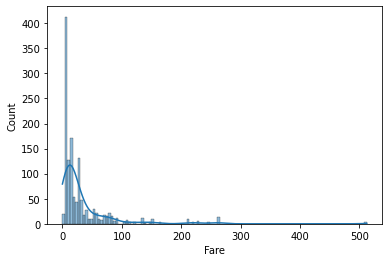

In [52]:
sns.histplot(dataset['Fare'],kde='True')
print('Skew:',dataset['Fare'].skew())

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skew: nan


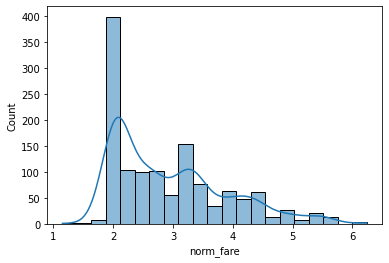

In [53]:
# log norm of fare 
dataset['norm_fare'] = np.log(dataset.Fare)
sns.histplot(dataset['norm_fare'],kde='True')
print('Skew:',dataset['norm_fare'].skew())

Skew: 2.0882893025090605


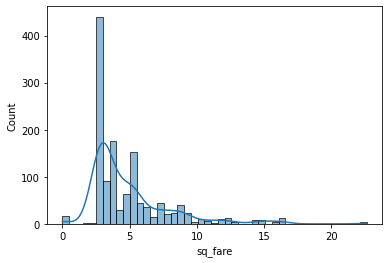

In [54]:
#square root transformation 
dataset['sq_fare'] = dataset['Fare']**(1/2)
sns.histplot(dataset['sq_fare'],kde='True')
print('Skew:',dataset['sq_fare'].skew())

Skew: 1.538609113365666


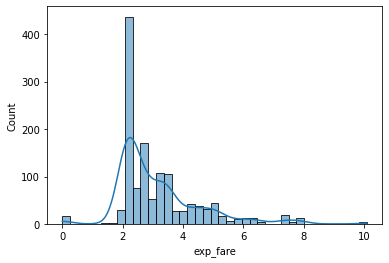

In [55]:
dataset['exp_fare']=dataset['Fare']**(1/2.7)
sns.histplot(dataset['exp_fare'],kde='True')
print('Skew:',dataset['exp_fare'].skew())

skew -0.056947576885828195


<AxesSubplot:xlabel='Fare_YJ', ylabel='Count'>

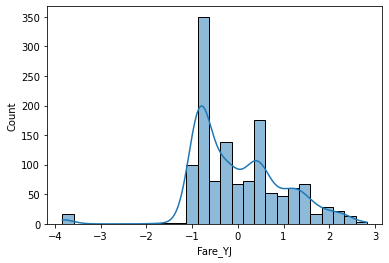

In [56]:

"""
Below is one of the two power transformers  yeo johnson and box cox but we cant use boxcox on 0 
or negative values so used yeo john transformer here"""
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
ptdata=pd.DataFrame(pt.fit_transform(dataset['Fare'].values.reshape(-1,1)),columns=['Fare_YJ'])
print('skew',ptdata['Fare_YJ'].skew())
sns.histplot(ptdata['Fare_YJ'],kde='True')

In [57]:
#Assign the Yj transformed values to dataset
dataset['Fare_transformed']=ptdata['Fare_YJ']
dataset.drop(labels = ["Fare"], axis = 1, inplace = True) #drop actual Fare feature from the dataset

In [58]:
dataset.drop(labels = ['norm_fare','exp_fare','sq_fare'], axis = 1, inplace = True) #drop transformed column

In [59]:
dataset['Fare_transformed'].min(),dataset['Fare_transformed'].max()

(-3.8325960514396753, 2.8196338617831143)

### Age

Age has normally distributed data and very low skew so no need to transform the data

Skew_Age 0.5404952253605563


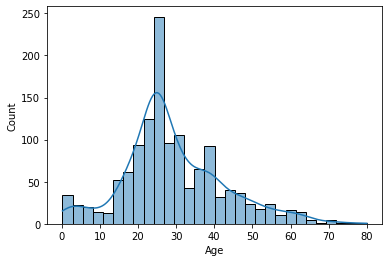

In [60]:
sns.histplot(dataset['Age'],kde='True')
print ('Skew_Age',dataset['Age'].skew())  # Age have very low skew value so not applying the transformation

### SibSp

SibSp has relatively high skew so need to transform to reduce the skew and make the data normally distributed

Skew_Sibp 3.844220342922907


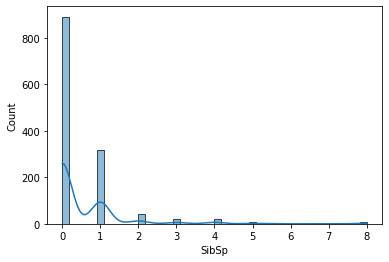

In [61]:
sns.histplot(dataset['SibSp'],kde='True')
print ('Skew_Sibp',dataset['SibSp'].skew()) 

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skew: nan


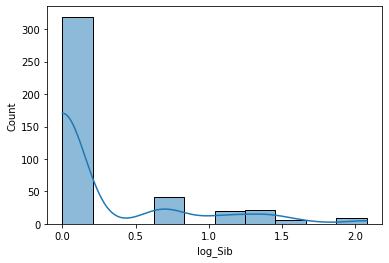

In [62]:
# log norm of Sibsp
dataset['log_Sib'] = np.log(dataset.SibSp)
sns.histplot(dataset['log_Sib'],kde='True')
print('Skew:',dataset['log_Sib'].skew())

skew 0.7965686892843059


<AxesSubplot:xlabel='sib_YJ', ylabel='Count'>

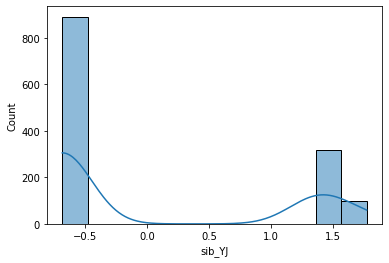

In [63]:
ptdata=pd.DataFrame(pt.fit_transform(dataset['SibSp'].values.reshape(-1,1)),columns=['sib_YJ'])
print('skew',ptdata['sib_YJ'].skew())
sns.histplot(ptdata['sib_YJ'],kde='True')

In [64]:
dataset['Sib_norm']=ptdata['sib_YJ'] #Added Yeo-joh transformed Sibsp to the dataset
dataset.drop(labels = ["SibSp"], axis = 1, inplace = True) #drop actual SibSp columns
dataset.drop(labels = ["log_Sib"], axis = 1, inplace = True) #a log transformation created earlier , decicded not to use so deleting it from the dataset

### Parch

Skew_Parch 3.6690782036511136


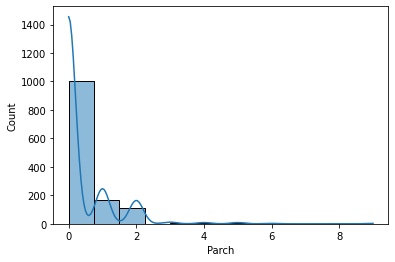

In [65]:
sns.histplot(dataset['Parch'],kde='True')
print ('Skew_Parch',dataset['Parch'].skew()) 

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skew: nan


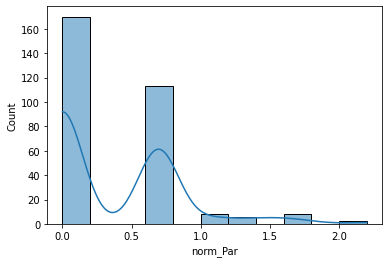

In [66]:
# log norm of Parch
dataset['norm_Par'] = np.log(dataset.Parch)
sns.histplot(dataset['norm_Par'],kde='True')
print('Skew:',dataset['norm_Par'].skew())
dataset.drop(labels = ["norm_Par"], axis = 1, inplace = True) #drop transformed column

HANDLE CATAGORICAL FEATURES INTO NUMERICAL ,ONE HOT ENCODING

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          891 non-null    float64
 2   Pclass            1309 non-null   int64  
 3   Sex               1309 non-null   object 
 4   Age               1309 non-null   float64
 5   Parch             1309 non-null   int64  
 6   Ticket            1309 non-null   object 
 7   Cabin             1309 non-null   object 
 8   Embarked          1309 non-null   object 
 9   Title             1309 non-null   int64  
 10  Family            1309 non-null   object 
 11  Fare_transformed  1309 non-null   float64
 12  Sib_norm          1309 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB


## Catagorical Data to One-Hot Encoding

In [68]:
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],drop_first=True,prefix="Pcl")

In [69]:
dataset["Family"] = dataset["Family"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Family"],drop_first=True,prefix="Fam")

In [70]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],drop_first=True,prefix="Cabin")
dataset = pd.get_dummies(dataset, columns = ["Ticket"],drop_first=True, prefix="T")

In [71]:
dataset = pd.get_dummies(dataset, columns = ["Title"],drop_first=True)
dataset = pd.get_dummies(dataset, columns = ["Embarked"],drop_first=True, prefix="Em")
dataset = pd.get_dummies(dataset, columns = ["Sex"],drop_first=True, prefix="Emb")

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          891 non-null    float64
 2   Age               1309 non-null   float64
 3   Parch             1309 non-null   int64  
 4   Fare_transformed  1309 non-null   float64
 5   Sib_norm          1309 non-null   float64
 6   Pcl_2             1309 non-null   uint8  
 7   Pcl_3             1309 non-null   uint8  
 8   Fam_Couple        1309 non-null   uint8  
 9   Fam_LargeFam      1309 non-null   uint8  
 10  Fam_Single        1309 non-null   uint8  
 11  Fam_SmallFam      1309 non-null   uint8  
 12  Cabin_B           1309 non-null   uint8  
 13  Cabin_C           1309 non-null   uint8  
 14  Cabin_D           1309 non-null   uint8  
 15  Cabin_E           1309 non-null   uint8  
 16  Cabin_F           1309 non-null   uint8  


## Further Normalization of Few Features

CHECK THE INFO OF THE DATA AND DECIDE WHETHER DO WE NEED TO NORMALIZE ANY FEATURES

In [73]:
pd.set_option('display.max_columns',80) #this is nothing but to display all the columns in visualization

In [74]:
dataset.describe()
#Mean std of Age is differnet from the remaining all the features

,PassengerId,Survived,Age,Parch,Fare_transformed,Sib_norm,Pcl_2,Pcl_3,Fam_Couple,Fam_LargeFam,Fam_Single,Fam_SmallFam,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,T_A4,T_A5,T_AQ3,T_AQ4,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_LP,T_PC,T_PP,T_PPP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Title_2,Title_3,Title_4,Title_5,Title_6,Em_Q,Em_S,Emb_male
count,1309.000000,891.000000,1309.000000,1309.000000,1.309000e+03,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,29.179656,0.385027,2.297415e-16,-3.740324e-16,0.211612,0.541635,0.179526,0.048128,0.603514,0.154316,0.051948,0.079450,0.035141,0.032086,0.016043,0.003820,0.000764,0.763942,0.007639,0.021390,0.000764,0.000764,0.000764,0.006112,0.051948,0.000764,0.002292,0.006875,0.000764,0.003056,0.000764,0.070283,0.003056,0.001528,0.001528,0.000764,0.001528,0.003820,0.000764,0.010695,0.003820,0.006112,0.000764,0.005348,0.002292,0.018335,0.000764,0.010695,0.005348,0.000764,0.001528,0.011459,0.003056,0.731092,0.010695,0.001528,0.578304,0.046600,0.353705,0.093965,0.699771,0.644003
std,378.020061,0.486592,13.269138,0.865560,1.000382e+00,1.000382e+00,0.408607,0.498454,0.383939,0.214119,0.489354,0.361390,0.222007,0.270543,0.184207,0.176295,0.125688,0.061709,0.027639,0.424821,0.087103,0.144737,0.027639,0.027639,0.027639,0.077967,0.222007,0.027639,0.047836,0.082665,0.027639,0.055216,0.027639,0.255720,0.055216,0.039073,0.039073,0.027639,0.039073,0.061709,0.027639,0.102902,0.061709,0.077967,0.027639,0.072959,0.047836,0.134210,0.027639,0.102902,0.072959,0.027639,0.039073,0.106473,0.055216,0.443561,0.102902,0.039073,0.494019,0.210862,0.478302,0.291891,0.458533,0.478997
min,1.000000,0.000000,0.170000,0.000000,-3.832596e+00,-6.828521e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,22.000000,0.000000,-8.158919e-01,-6.828521e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,26.000000,0.000000,-1.900617e-01,-6.828521e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [75]:
#Apply standard scalar to Age to tranform
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
dataset['Age'] = sc.fit_transform(pd.DataFrame(dataset['Age']))

In [76]:
dataset.describe()

,PassengerId,Survived,Age,Parch,Fare_transformed,Sib_norm,Pcl_2,Pcl_3,Fam_Couple,Fam_LargeFam,Fam_Single,Fam_SmallFam,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,T_A4,T_A5,T_AQ3,T_AQ4,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_LP,T_PC,T_PP,T_PPP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Title_2,Title_3,Title_4,Title_5,Title_6,Em_Q,Em_S,Emb_male
count,1309.000000,891.000000,1.309000e+03,1309.000000,1.309000e+03,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,1.249319e-16,0.385027,2.297415e-16,-3.740324e-16,0.211612,0.541635,0.179526,0.048128,0.603514,0.154316,0.051948,0.079450,0.035141,0.032086,0.016043,0.003820,0.000764,0.763942,0.007639,0.021390,0.000764,0.000764,0.000764,0.006112,0.051948,0.000764,0.002292,0.006875,0.000764,0.003056,0.000764,0.070283,0.003056,0.001528,0.001528,0.000764,0.001528,0.003820,0.000764,0.010695,0.003820,0.006112,0.000764,0.005348,0.002292,0.018335,0.000764,0.010695,0.005348,0.000764,0.001528,0.011459,0.003056,0.731092,0.010695,0.001528,0.578304,0.046600,0.353705,0.093965,0.699771,0.644003
std,378.020061,0.486592,1.000382e+00,0.865560,1.000382e+00,1.000382e+00,0.408607,0.498454,0.383939,0.214119,0.489354,0.361390,0.222007,0.270543,0.184207,0.176295,0.125688,0.061709,0.027639,0.424821,0.087103,0.144737,0.027639,0.027639,0.027639,0.077967,0.222007,0.027639,0.047836,0.082665,0.027639,0.055216,0.027639,0.255720,0.055216,0.039073,0.039073,0.027639,0.039073,0.061709,0.027639,0.102902,0.061709,0.077967,0.027639,0.072959,0.047836,0.134210,0.027639,0.102902,0.072959,0.027639,0.039073,0.106473,0.055216,0.443561,0.102902,0.039073,0.494019,0.210862,0.478302,0.291891,0.458533,0.478997
min,1.000000,0.000000,-2.187086e+00,0.000000,-3.832596e+00,-6.828521e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,-5.412861e-01,0.000000,-8.158919e-01,-6.828521e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,-2.397195e-01,0.000000,-1.900617e-01,-6.828521e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

# 3. FEATURE SELECTION 

## Drop Irrrelevent Data

In [77]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True) #drop irrelevent passenger id

### PCA

PCA can be done to reduce the dimensions or number of features

# 4.MODEL CREATION

"""
1.The steps we are following here is select 10 best classification algorithms and run with default values ,
2.Select the best 5 models by checking the score by cross validastion scores
3.Then hypertune the best 5 models by selecting the best hyperparameters using GrivSearch
4.Use soft voting technique to combine the outputs from all the models (Ensemble model creation) """

In [78]:

"""Split train and test datas from dataset and delete survived col from test data , 
   PN:Here test is the data we need to predict for submission , to the test data we used for regular validation purpose.
"""
train=dataset.iloc[:len(train)] #split 
test=dataset.iloc[len(train):]
test.drop(labels=["Survived"],axis = 1,inplace=True) #or test.drop(columns=['Survived'],inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
train['Survived']=train['Survived'].astype(int)
Y_train=train['Survived']
X_train=train.drop(columns=['Survived'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Base line model selection

In [80]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [81]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [82]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

In [83]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [84]:

cv_result = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})
cv_result.sort_values(by='CrossValerrors',ascending=False)


,CrossValMeans,CrossValerrors,Algorithm
3,0.819351,0.049132,RandomForest
2,0.802534,0.046828,AdaBoost
4,0.811498,0.043180,ExtraTrees
5,0.835031,0.041079,GradientBoosting
7,0.820487,0.038221,KNeighboors
1,0.803670,0.036426,DecisionTree
9,0.823820,0.034671,LinearDiscriminantAnalysis
0,0.830524,0.034624,SVC
8,0.828290,0.032151,LogisticRegression
6,0.823820,0.027800,MultipleLayerPerceptron


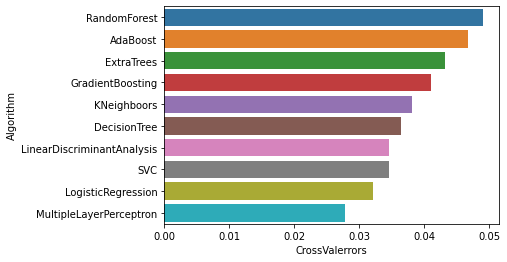

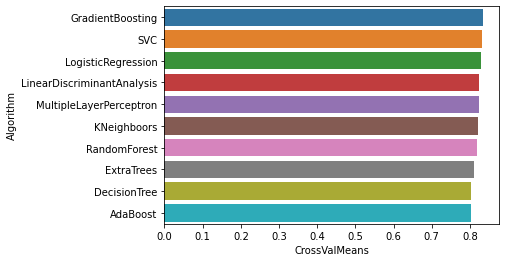

In [85]:
sns.barplot(x='CrossValerrors',y='Algorithm',data=cv_result.sort_values(by='CrossValerrors',ascending=False))
plt.show()
sns.barplot(x='CrossValMeans',y='Algorithm',data=cv_result.sort_values(by='CrossValMeans',ascending=False),)
plt.show()

"""Based on the above result we selected the best five models as base line models for further tuning or  hyperparameter optimization and creating Ensemble model for prediction """

## Hyper Parameter Optimization

#### Ada Boost

In [86]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   11.8s finished


0.8160174781523096

#### Extra tree Classifier

In [87]:
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


0.8305243445692885

#### SVC

In [88]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   36.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.2min finished


0.836167290886392

#### RFC

In [89]:

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.3min finished


#### Gradient Boosting

In [90]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.3min finished


0.8316479400749064

## Ensemble Model Creation

In [91]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
ensemble_results.head(3)

,RFC,ExtC,Ada,GBC,SVC
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0


<AxesSubplot:>

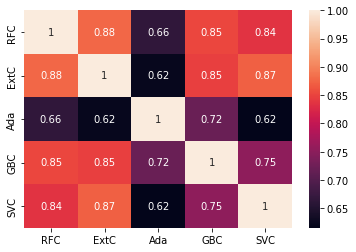

In [92]:
sns.heatmap(ensemble_results.corr(),annot=True,cbar=True)

In [93]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

Ensemble_train = votingC.fit(X_train, Y_train)

# SUBMISSION.

In [94]:
output = pd.DataFrame({'PassengerId': IDtest, 'Survived': Ensemble_train.predict(test)})
output.to_csv('submission.csv',index=False)